In [ ]:
import numpy as np
import pandas as pd
import os 
from os import listdir
import cv2
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,auc,roc_auc_score
from itertools import cycle
from sklearn.decomposition import PCA
import  seaborn as sns

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset_path='/content/drive/MyDrive/Satellite_image/Train_data'
test_dataset_path='/content/drive/MyDrive/Satellite_image/test_data'

In [ ]:
"""loading the image path and storing in a list"""
allfile=[]
for f in listdir(train_dataset_path):
    for i in listdir(train_dataset_path+'/'+f):
        allfile.append(train_dataset_path+'/'+f+'/'+i)

In [ ]:
labels=[os.path.split(os.path.split(i)[0])[1] for i in allfile ]#labels or class  in dataset
label=np.unique(labels)
label_list=label.tolist()
label_list

['agricultural',
 'baseballdiamond',
 'beach',
 'buildings',
 'forest',
 'parkinglot']

In [ ]:
"""Converting each image path to a series"""
train_images=pd.Series(allfile,name='Images')
train_class=pd.Series(labels,name='labels')
Train_img_df=pd.concat([train_images,train_class],axis=1)

Train_img_df.head()

,Images,labels
0,/content/drive/MyDrive/Satellite_image/Train_d...,forest
1,/content/drive/MyDrive/Satellite_image/Train_d...,forest
2,/content/drive/MyDrive/Satellite_image/Train_d...,forest
3,/content/drive/MyDrive/Satellite_image/Train_d...,forest
4,/content/drive/MyDrive/Satellite_image/Train_d...,forest


In [ ]:
Train_img_df['labels'].value_counts()#number of images in each classes

forest             350
parkinglot         350
buildings          350
agricultural       350
baseballdiamond    350
beach              350
Name: labels, dtype: int64

In [ ]:
"""Reading the images"""
train_image=[]
for  i in Train_img_df['Images'].values:
  img=cv2.imread(i)
 
  
  train_image.append(img)

In [ ]:
"""Reshaping of image"""
shape=(160,160)
reshape=[]

for i in range(len(train_image)):
  resize_image=cv2.resize(train_image[i],shape)
  gray=cv2.cvtColor(resize_image,cv2.COLOR_BGR2RGB)
  reshape.append(gray.flatten())

In [ ]:
images_np=np.array(reshape)#converting it into numpy


In [ ]:
Y=Train_img_df['labels']#target variable

In [ ]:
"""Converting categorical value to numeric value"""
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
target_variable=encode.fit_transform(Y)
target_variable=np.array(target_variable)
len(target_variable)

2100

In [ ]:
df=pd.DataFrame(images_np)#creating dataframe
df['labels']=target_variable

In [ ]:
X_train=df.drop('labels',axis=1)#Independent varaible
Y_train=df['labels']#dependent variable/target variable
Y_train

0       4
1       4
2       4
3       4
4       4
       ..
2095    2
2096    2
2097    2
2098    2
2099    2
Name: labels, Length: 2100, dtype: int64

In [ ]:
"""loading the images path of the test dataset"""
testfile=[]
for f in listdir(test_dataset_path):
    for i in listdir(test_dataset_path+'/'+f):
        testfile.append(test_dataset_path+'/'+f+'/'+i)

In [ ]:
testlabels=[os.path.split(os.path.split(i)[0])[1] for i in testfile ]#labels in the dataset
testlabel=np.unique(testlabels)
testlabel_list=testlabel.tolist()

In [ ]:
"""Converting each image path to a series"""
test_images=pd.Series(testfile,name='Images')
test_class=pd.Series(testlabels,name='labels')
Test_img_df=pd.concat([test_images,test_class],axis=1)

In [ ]:
Test_img_df['labels'].value_counts()#number of images in each class

agricultural       50
forest             50
beach              50
parkinglot         50
buildings          50
baseballdiamond    50
Name: labels, dtype: int64

In [ ]:
test_image=[]
for  i in Test_img_df['Images'].values:
  image=cv2.imread(i)#reading the images
  test_image.append(image)

In [ ]:
"""Reshaping the images"""
shape=(160,160)
test_reshape=[]
for i in range(len(test_image)):
  resize_image=cv2.resize(test_image[i],shape)
  gray_image=cv2.cvtColor(resize_image,cv2.COLOR_BGR2RGB)
  test_reshape.append(gray_image.flatten())

In [ ]:
test_image_np=np.array(test_reshape)#converting it into numpy

In [ ]:
testdf=pd.DataFrame(test_image_np)#creating the dataframe
label_variable=Test_img_df['labels']

In [ ]:
"""Label encoding to convert categorical value into numberic value"""
encode=LabelEncoder()
label_variable=encode.fit_transform(label_variable)
label_var=np.array(label_variable)
testdf['labels']=label_var
X_test=testdf.drop('labels',axis=1)
Y_test=testdf['labels']

In [ ]:
"""Scaling of data"""
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)
X_test_sc[1]

array([2.2616702 , 1.68483916, 2.00394557, ..., 1.86817783, 1.23969278,
       1.74620995])

In [ ]:
"""PCA for dimension reduction"""
pca=PCA(n_components=20)
pca.fit(X_train_sc)
x_train_pca=pca.transform(X_train_sc)
x_test_pca=pca.transform(X_test_sc)

In [ ]:
"""Training the svm model and testing on the testdata"""
sc=svm.SVC(C=2.3,kernel='rbf',probability=True)
svm_model=sc.fit(x_train_pca,Y_train)
svm_pred_proba=svm_model.predict_proba(x_test_pca)#predciting data,which returns the proabolity value
svm_pred=svm_model.predict(x_test_pca)#prediction
y_actual=np.array(Y_test)
test_acc=accuracy_score(y_actual,svm_pred)#accuracy of the model
train_acc=svm_model.score(x_train_pca,Y_train)#accuracy of training model
print("Model accuracy ",test_acc)
print("Training Accuracy ",train_acc)

Model accuracy  0.6266666666666667
Training Accuracy  0.7790476190476191


Confusion  matrix SVM model


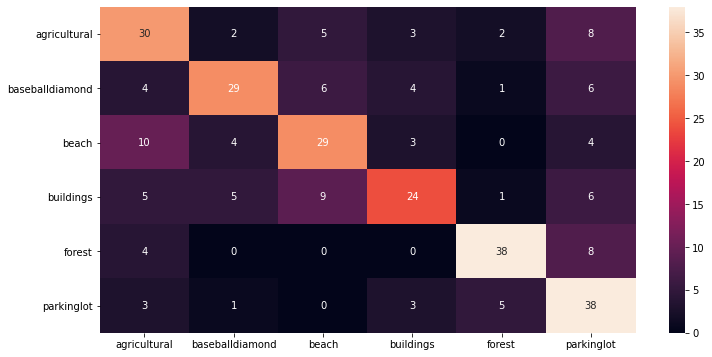

In [ ]:
print("Confusion  matrix SVM model")
plt.figure(figsize=(12,6))
cf=confusion_matrix(y_actual,svm_pred)
sns.heatmap(cf,annot=True,fmt='d',xticklabels=label_list,yticklabels=label_list)
plt.show()

In [ ]:
"""Svm classification report"""
class_rep=classification_report(y_actual,svm_pred,target_names=label_list)
print(class_rep)

                 precision    recall  f1-score   support

   agricultural       0.54      0.60      0.57        50
baseballdiamond       0.71      0.58      0.64        50
          beach       0.59      0.58      0.59        50
      buildings       0.65      0.48      0.55        50
         forest       0.81      0.76      0.78        50
     parkinglot       0.54      0.76      0.63        50

       accuracy                           0.63       300
      macro avg       0.64      0.63      0.63       300
   weighted avg       0.64      0.63      0.63       300



In [ ]:

import cv2
resh_test=[]
for i in range(len(X_test)):
   im=X_test.iloc[i]
   img=im.values.reshape(160,160,3)
   resh_test.append(img)
img=np.array(resh_test)



(300, 160, 160, 3)

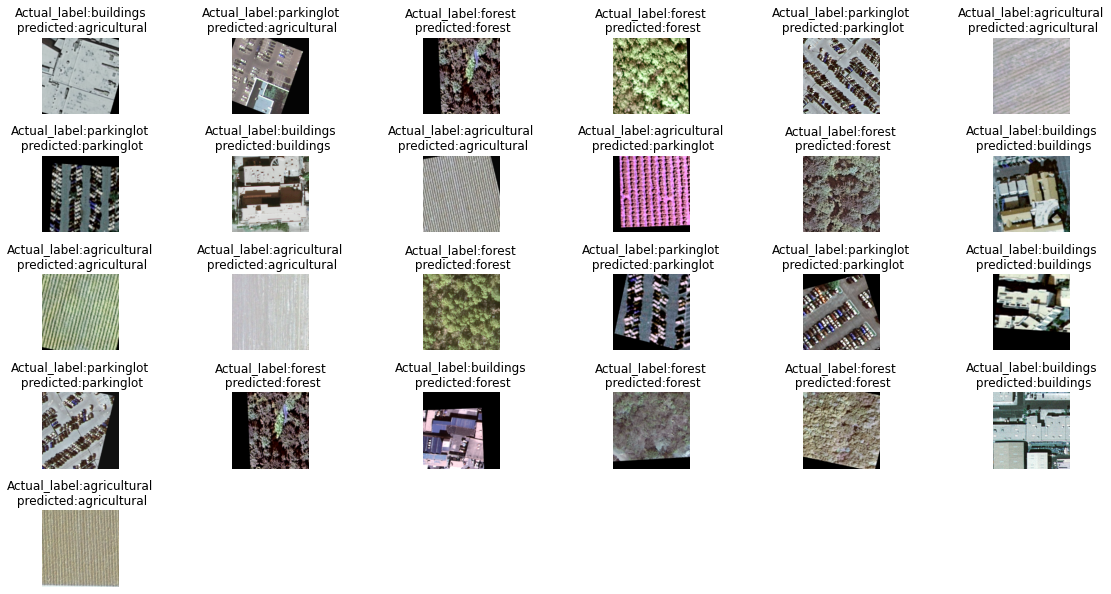

In [ ]:

plt.figure(figsize=(16,10))
k=1
for i in np.random.randint(1,200,25):

  plt.subplot(6,6,k)
  k=k+1
  
  plt.imshow(cv2.cvtColor(img[i],cv2.COLOR_BGR2RGB))
 
  plt.title(f"Actual_label:{label_list[y_actual[i]]}\n predicted:{label_list[svm_pred[i]]}")

  plt.axis('off')
  plt.tight_layout()

In [ ]:
"""KNN model"""
knn=KNeighborsClassifier(n_neighbors=5)#creating the object of KNN classifier
knn_model=knn.fit(x_train_pca,Y_train)#traing the model
Knn_actual=np.array(Y_test)

knn_pred=knn_model.predict(x_test_pca)#predicting the unseen data
Knn_pred_prob=knn_model.predict_proba(x_test_pca)#predciting model that gives proability value
knn_test_acc=accuracy_score(Knn_actual,knn_pred)#accuracy of the model

knn_train_acc=knn_model.score(x_train_pca,Y_train)#accuracy of the training dataset
print("KNN model test acc",knn_test_acc)
print("KNN model train acc",knn_train_acc)

KNN model test acc 0.47
KNN model train acc 0.6066666666666667


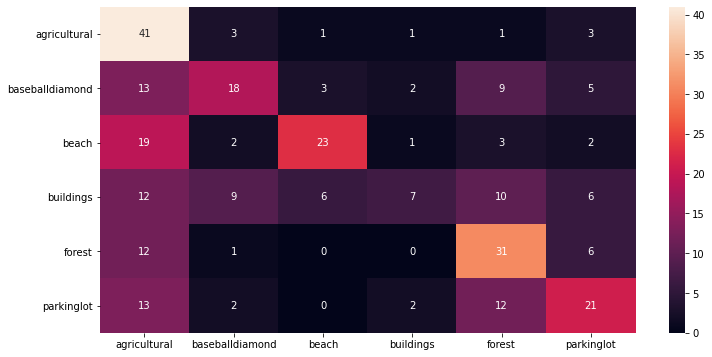

In [ ]:
"""KNN confusion matrix"""
plt.figure(figsize=(12,6))
cf=confusion_matrix(Knn_actual,knn_pred)
sns.heatmap(cf,annot=True,fmt='d',xticklabels=label_list,yticklabels=label_list)
plt.show()

In [ ]:
"""KNN classification report"""
class_rep=classification_report(y_actual,knn_pred,target_names=label_list)

print(class_rep)

                 precision    recall  f1-score   support

   agricultural       0.37      0.82      0.51        50
baseballdiamond       0.51      0.36      0.42        50
          beach       0.70      0.46      0.55        50
      buildings       0.54      0.14      0.22        50
         forest       0.47      0.62      0.53        50
     parkinglot       0.49      0.42      0.45        50

       accuracy                           0.47       300
      macro avg       0.51      0.47      0.45       300
   weighted avg       0.51      0.47      0.45       300



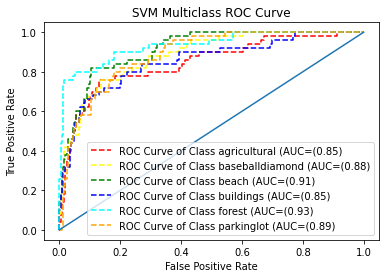

In [ ]:
""" SVM model ROC curve of"""
fpr={}
tpr={}
thres={}
roc_auc=dict()
color=['red','yellow','green','blue','aqua','orange']
for i in range(len(label_list)):
  fpr[i],tpr[i],thres[i]=roc_curve(y_actual,svm_pred_proba[:,i],pos_label=i)
  roc_auc[i]=auc(fpr[i],tpr[i])
for i,j,color in zip(range(len(label_list)),label_list,color):
  plt.plot(fpr[i],tpr[i],linestyle='--',color=color,label=f'ROC Curve of Class {j} (AUC=({roc_auc[i]:.2f})')
plt.plot([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("SVM Multiclass ROC Curve")
plt.legend(loc='lower right')

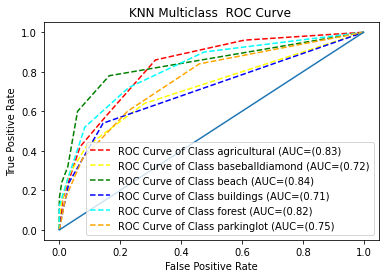

In [ ]:
"""KNN model ROC Curve """
fpr={}
tpr={}
thres={}
roc_auc=dict()
color=['red','yellow','green','blue','aqua','orange']
for i in range(len(label_list)):
  fpr[i],tpr[i],thres[i]=roc_curve(Knn_actual,Knn_pred_prob[:,i],pos_label=i)
  roc_auc[i]=auc(fpr[i],tpr[i])
for i,j,color in zip(range(len(label_list)),label_list,color):
  plt.plot(fpr[i],tpr[i],linestyle='--',color=color,label=f'ROC Curve of Class {j} (AUC=({roc_auc[i]:.2f})')
plt.plot([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("KNN Multiclass  ROC Curve ")
plt.legend(loc='lower right')